# SciPy - Spatial

https://en.wikipedia.org/wiki/Delaunay_triangulation#:~:text=For%20modelling%20terrain%20or%20other,See%20triangulated%20irregular%20network.
    
For modelling terrain or other objects given a set of sample points, the Delaunay triangulation gives a nice set of triangles to use as polygons in the model.

The scipy.spatial package can compute Triangulations, Voronoi Diagrams and Convex Hulls of a set of points, by leveraging the Qhull library. 

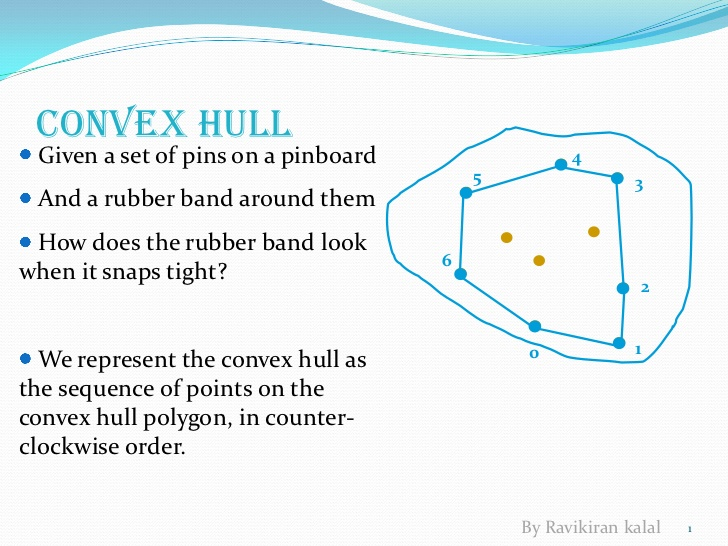

Moreover, it contains KDTree (K-Dimensional Tree) implementations for nearest-neighbor point queries and utilities for distance computations in various metrics.

## Delaunay Triangulations

Let us understand what Delaunay Triangulations are and how they are used in SciPy.

## What are Delaunay Triangulations?

In mathematics and computational geometry, DT (Delaunay Triangulation) for a given set P of discrete points in a plane is a triangulation DT(P), such that no point in P is inside the circumcircle of any triangle in DT(P).

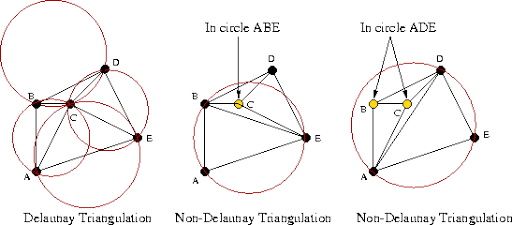


### Note:

- Voronoi is pronounced as vo-ro-noi.

- Delaunay is pronounced as De-long-ne.

### What is Circumcircle?

- The circumcircle (Around-Cicrle) is a triangle's circumscribed circle, i.e., the unique circle that passes through each of the triangle's three vertices. The center of the circumcircle is called the circumcenter, and the circle's radius is called the circumradius.

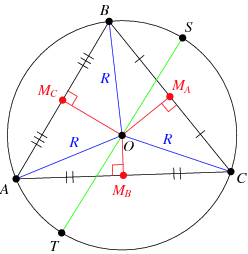

### scipy.spatial.Delaunay

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html
    
Delaunay tesselation (shape arrarngement) in N dimensions.

### matplotlib.pyplot.triplot

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.triplot.html
    
Draw a unstructured triangular grid as lines and/or markers.

The triangulation to plot can be specified in one of two ways; either:
    
    triplot(triangulation, ...)
    
where triangulation is a matplotlib.tri.Triangulation object, or

    triplot(x, y, ...)
    triplot(x, y, triangles, ...)
    triplot(x, y, triangles=triangles, ...)
    triplot(x, y, mask=mask, ...)
    triplot(x, y, triangles, mask=mask, ...)
        
We can the compute the same through SciPy. 

Let us consider the following example.

# Example:

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html#scipy-spatial-delaunay
    
Delaunay Triangulation of a set of points:

## Delaunay Triangulation of a set of points

- Define a set of points
- Delaunay tesselation (Shape arrangement) in N dimensions. 

points:
[[0.  0. ]
 [0.  1.1]
 [1.  0. ]
 [1.  1. ]]

Delaunay tesselation => tri = Delaunay(points):



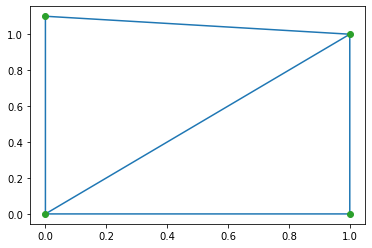

In [19]:
# Delaunay Triangulation of a set of points:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
print('points:')
print(points)
print()

# Delaunay tesselation (Shape arrangement) in N dimensions. 
from scipy.spatial import Delaunay
tri = Delaunay(points)
print('Delaunay tesselation => tri = Delaunay(points):')
print(tri)
print()

# Plot the simplices (Simplified Shape)
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

## Find Indexes of Triangles and Neighbors 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html#scipy-spatial-delaunay
    
We mark the labels for each vertices represented by a label (0, 1, 2, 3).
We have two triangles which vertices are labeled as [3, 2, 0] and [3, 1, 0].

- Point indexes and coordinates for the two triangles forming the triangulation.
- Each Triangle have three side and have maximum three neighbors. In this example, we have two trinagles.  
Triangle 0 has only one neighbor which is triangle 1. Triangle 1 has only one neighbor which is trangle 0. 
Indexes of neighbor simplices for each simplex. 
The kth neighbor is opposite to the kth vertex. 
For simplices at the boundary, -1 denotes no neighbor.

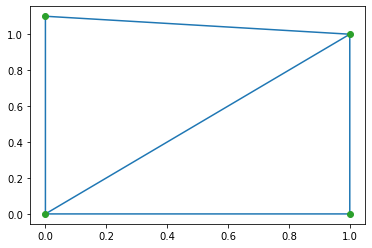

simplices (simplified shape) => tri.simplices:
[[2 3 0]
 [3 1 0]]

tri.vertices:
[[2 3 0]
 [3 1 0]]

points[tri.simplices]:
[[[1.  0. ]
  [1.  1. ]
  [0.  0. ]]

 [[1.  1. ]
  [0.  1.1]
  [0.  0. ]]]

tri.vertex_neighbor_vertices:
(array([ 0,  3,  5,  7, 10], dtype=int32), array([2, 3, 1, 3, 0, 3, 0, 2, 0, 1], dtype=int32))

points[tri.simplices[0,0]]:
[1. 0.]
points[tri.simplices[0,1]]:
[1. 1.]
points[tri.simplices[0,2]]:
[0. 0.]
points[tri.simplices[1,0]]:
[1. 1.]
points[tri.simplices[1,1]]:
[0.  1.1]
points[tri.simplices[1,2]]:
[0. 0.]

tri.neighbors[1] => Triangle 0:
[-1  0 -1]

tri.neighbors[0] => Triangle 1:
[ 1 -1 -1]



In [48]:
# Delaunay Triangulation of a set of points:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

# Delaunay tesselation (Shape arrangement) in N dimensions. 
from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

# Point indexes and coordinates for the two triangles forming the triangulation:
# simplices (simplified shape).
# We mark the labels for each vertices represented by a label (0, 1, 2, 3).
# We have two trangules which vertices are labeled as [3, 2, 0] and [3, 1, 0].
# Each corrdinates are represented by a label (0, 1, 2, 3).
# We have two trangules [3, 2, 0] and [3, 1, 0]. 
print('simplices (simplified shape) => tri.simplices:')
print(tri.simplices)
print()
#array([[3, 2, 0],
#       [3, 1, 0]], dtype=int32)

print('tri.vertices:')
print(tri.vertices)
print()
# tri.vertices:
#[[2 3 0]
# [3 1 0]]

print('points[tri.simplices]:')
print(points[tri.simplices])
print()
#array([[[ 1. ,  1. ],
#        [ 1. ,  0. ],
#        [ 0. ,  0. ]],
#       [[ 1. ,  1. ],
#        [ 0. ,  1.1],
#        [ 0. ,  0. ]]])

print('tri.vertex_neighbor_vertices:')
print(tri.vertex_neighbor_vertices)
print()

# array([-1,  0, -1], dtype=int32)
print('points[tri.simplices[0,0]]:')
print(points[tri.simplices[0,0]])
print('points[tri.simplices[0,1]]:')
print(points[tri.simplices[0,1]])
print('points[tri.simplices[0,2]]:')
print(points[tri.simplices[0,2]])
print('points[tri.simplices[1,0]]:')
print(points[tri.simplices[1,0]])
print('points[tri.simplices[1,1]]:')
print(points[tri.simplices[1,1]])
print('points[tri.simplices[1,2]]:')
print(points[tri.simplices[1,2]])
print()
# points[tri.simplices[0,0]]:
#[1. 0.]
#points[tri.simplices[0,1]]:
#[1. 1.]
#points[tri.simplices[0,2]]:
#[0. 0.]
#points[tri.simplices[1,0]]:
#[1. 1.]
#points[tri.simplices[1,1]]:
#[0.  1.1]
#points[tri.simplices[1,2]]:
#[0. 0.]

# Each Triangle have three side and have maximum three neighbors. In this example, we have two trinagles.  
# Triangle 0 has only one neighbor which is triangle 1. Triangle 1 has only one neighbor which is trangle 0. 
# Indexes of neighbor simplices for each simplex. 
# The kth neighbor is opposite to the kth vertex. 
# For simplices at the boundary, -1 denotes no neighbor.
print('tri.neighbors[1] => Triangle 0:')
print(tri.neighbors[1])
print()
print('tri.neighbors[0] => Triangle 1:')
print(tri.neighbors[0])
print()

## Find Point inside triangle

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html#scipy-spatial-delaunay
    
- We can find out which triangle points are in.
- We can also compute barycentric coordinates in triangle 1 for these points.
- The coordinates for the first point are all positive, meaning it is indeed inside the triangle.

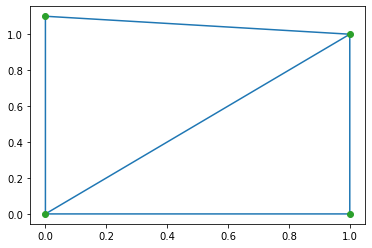

[(0.4, 0.2), (0.8, 0.2)]=> tri.find_simplex(p):
[0 0]

[(0.2, 0.4), (0.2, 0.8)] => tri.find_simplex(p):
[1 1]
[(1.5, 0.5), (0.2, 1.5)] => tri.find_simplex(p):
[-1 -1]


In [54]:
# Delaunay Triangulation of a set of points:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

# Delaunay tesselation (Shape arrangement) in N dimensions. 
from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

# We can find out which triangle points are in:
p = np.array([(0.4, 0.2), (0.8, 0.2)])
print('[(0.4, 0.2), (0.8, 0.2)]=> tri.find_simplex(p):')
print(tri.find_simplex(p))
print()
# array([ 1, -1], dtype=int32)

p = np.array([(0.2, 0.4), (0.2, 0.8)])
print('[(0.2, 0.4), (0.2, 0.8)] => tri.find_simplex(p):')
print(tri.find_simplex(p))


p = np.array([(1.5, 0.5), (0.2, 1.5)])
print('[(1.5, 0.5), (0.2, 1.5)] => tri.find_simplex(p):')
print(tri.find_simplex(p))

# Barycenter (Common Center for Mass)

The Barycentric (Common Center for Mass) coordinate system is a coordinate system in which the location of a point is specified by reference to a simplex (a triangle for points in a plane, a tetrahedron for points in three-dimensional space, etc.).

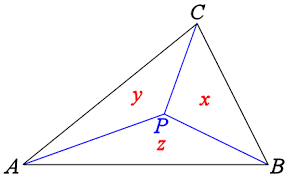

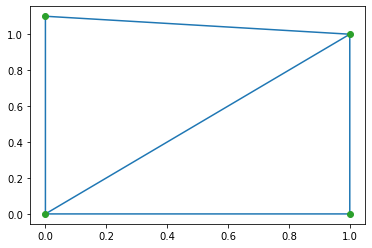

np.c_[b, 1 - b.sum(axis=1)]:
[[ 1.5         0.5        -1.        ]
 [-1.18181818  0.90909091  1.27272727]]


In [53]:
# Delaunay Triangulation of a set of points:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

# Delaunay tesselation (Shape arrangement) in N dimensions. 
from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

# We can also compute barycentric coordinates in triangle 1 for these points:
b = tri.transform[1,:2].dot(p - tri.transform[1,2])
print('np.c_[b, 1 - b.sum(axis=1)]:')
print(np.c_[b, 1 - b.sum(axis=1)])
# array([[ 0.1       ,  0.2       ,  0.7       ],
#       [ 1.27272727,  0.27272727, -0.54545455]])

# The coordinates for the first point are all positive, meaning it is indeed inside the triangle.

# Coplanar Points

Let us understand what Coplanar Points are and how they are used in SciPy.

## What are Coplanar Points?

https://en.wikipedia.org/wiki/Coplanarity

Coplanar points are three or more points that lie in the same plane.

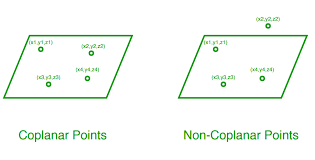

Recall that a plane is a flat surface, which extends without end in all directions.

It is usually shown in math textbooks as a four-sided figure.

Let us see how we can find this using SciPy. Let us consider the following example.

For example, three points are always coplanar, and if the points are distinct and non-collinear, the plane they determine is unique. 

However, a set of four or more distinct points will, in general, not lie in a single plane.

## Coplanar (Common Plane)

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html#scipy-spatial-delaunay
    
    coplanar (ndarray of int, shape (ncoplanar, 3))

Indexes coplanar points and the corresponding indices of the nearest facet and the nearest vertex. 

Coplanar points are input points which were not included in the triangulation due to numerical precision issues. 

points:
[[0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]]



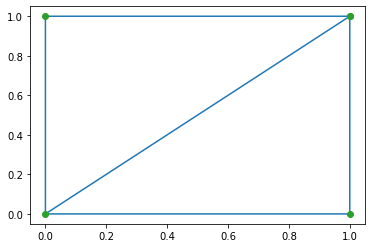

tri.coplanar:
[[4 0 3]]


In [61]:
from scipy.spatial import Delaunay
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1]])
tri = Delaunay(points)
print('points:')
print(points)
print()
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

print('tri.coplanar:')
print(tri.coplanar)

We have five points 0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1], 4: [1, 1]
Two triangles: 0: [0, 1, 3], 1: [0, 2, 3]
This means that point 4 [1, 1] resides near triangle 0 [0, 1, 3] and vertex 3, but is not included in the triangulation.

# Convex hulls

Let us understand what convex hulls are and how they are used in SciPy.

https://en.wikipedia.org/wiki/Convex_hull

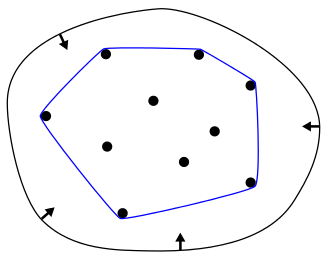

## What are Convex Hulls?

The convex hull of a set of points X in the Euclidean plane is the smallest convex set that contains X.

Let us consider the following example to understand it in detail.

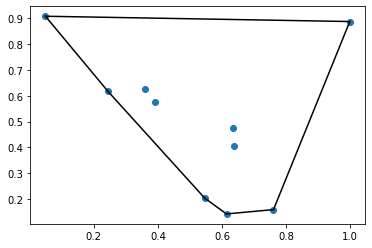

In [64]:
from scipy.spatial import ConvexHull
points = np.random.rand(10, 2) # 30 random points in 2-D

hull = ConvexHull(points)
import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], 'o')

for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()